# <a id='0'>Team_5:Movies Recommender System  Solution</a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Team_5:Movies-Recommender-System--Solution" data-toc-modified-id="Team_5:Movies-Recommender-System--Solution-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><a id="0">Team_5:Movies Recommender System  Solution</a></a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Problem Statement</a></span></li></ul></li><li><span><a href="#Comet-Experiment" data-toc-modified-id="Comet-Experiment-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comet Experiment</a></span></li><li><span><a href="#Loading-Dependencies" data-toc-modified-id="Loading-Dependencies-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Loading Dependencies</a></span><ul class="toc-item"><li><span><a href="#Import-the-libraries" data-toc-modified-id="Import-the-libraries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Import the libraries</a></span></li><li><span><a href="#Loading-the-data" data-toc-modified-id="Loading-the-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Loading the data</a></span></li><li><span><a href="#Data-description" data-toc-modified-id="Data-description-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Data description</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Modelling</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#References" data-toc-modified-id="References-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction

## Overview

On the internet, where the number of choices is overwhelming, there is a need to filter, prioritize and efficiently deliver relevant information in order to reduce the problem of information overload, which has created a potential problem to many Internet users. Recommender systems solve this problem by searching through large volume of dynamically generated information to provide users with personalized content and services.

Recommender systems are information filtering systems that deal with the problem of information overload by filtering vital information fragment out of large amount of dynamically generated information according to user’s preferences, interest, or observed behaviour about item. Recommender system has the ability to predict whether a particular user would prefer an item or not based on the user’s profile.

Recommender systems are beneficial to both service providers and users. They reduce transaction costs of finding and selecting items in an online shopping environment. Recommendation systems have also proved to improve decision making process and quality.

## Problem Statement

The aim of this project is to create a recomenderrecommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

# Comet Experiment

In [1]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="rhxOl6OrextNazWTBlB2j8YNW",
    project_name="team-5-unsupervised-ml",
    workspace="tsikaapp",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET WARNING: Failed to check backend version at URL: 'https://www.comet-ml.com/clientlib/isAlive/ver'
COMET INFO: Couldn't find a Git repository in 'C:\\Users\\HP\\Documents\\team5\\edsa-movie-recommendation-2022' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/tsikaapp/team-5-unsupervised-ml/65cbfda20cc149f280b941997b726a17



# Loading Dependencies

## Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
#from yellowbrick.cluster import KElbowVisualizer

from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise import SVD, SVDpp, SlopeOne, NMF, NormalPredictor
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import BaselineOnly, CoClustering
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV
from surprise import accuracy

import scipy as sp 


from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
import cufflinks as cf

import operator 
import heapq 
#import xgboost as xgb

#other libraries
from IPython.core.display import HTML
from IPython.display import YouTubeVideo
from collections import defaultdict

import re
# from IPython.display import display_html

import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [3]:
genome_scores = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('genome_tags.csv')
imdb = pd.read_csv('imdb_data.csv')
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
sample_submission = pd.read_csv('sample_submission.csv')

## Data description

* genome_scores.csv - a score mapping the strength between movies and tag-related properties.
* genome_tags.csv - user assigned tags for genome-related scores.
* imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
* links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* sample_submission.csv - Sample of the submission format for the hackathon.
* tags.csv - User assigned for the movies within the dataset.
* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

# Exploratory Data Analysis

In [4]:
print(train.shape)
train.info()

(10000038, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [5]:
print(test.shape)
test.info()

(5000019, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [6]:
print(movies.shape)
movies.info()

(62423, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [7]:
print(imdb.shape)
imdb.info()

(27278, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [8]:
print(links.shape)
links.info()

(62423, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [9]:
print(tags.shape)
tags.info()

(1093360, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


In [10]:
train.head()


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [11]:
train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [12]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [14]:
genome_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [15]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [16]:
# We analysing the train set
print("Total Train Data:")
print("Total number of movie ratings in Train data = "+str(train.shape[0]))
print("Number of unique users in Train data = "+str(len(np.unique(train["userId"]))))
print("Number of unique movies in Train data = "+str(len(np.unique(train["movieId"]))))
print("Highest value of a User ID = "+str(max(train["userId"].values)))
print("Highest value of a Movie ID = "+str(max(train["movieId"].values)))

Total Train Data:
Total number of movie ratings in Train data = 10000038
Number of unique users in Train data = 162541
Number of unique movies in Train data = 48213
Highest value of a User ID = 162541
Highest value of a Movie ID = 209171


### Ratings

Combined number of ratings:	 38970 
Total number of movies:		 48213


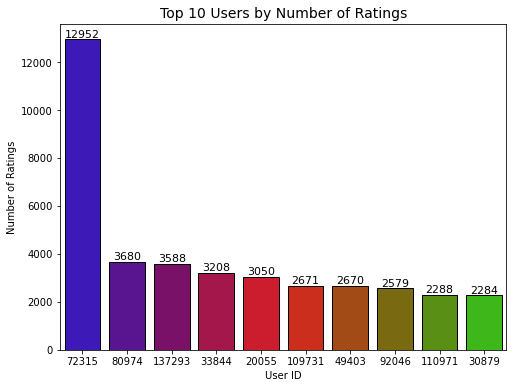

In [17]:
plt.figure(figsize=(8,6))
data = train['userId'].value_counts().head(10)
ax = sns.barplot(x = data.index, y = data, order= data.index, palette='brg', edgecolor="black")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
plt.title(f'Top {10} Users by Number of Ratings', fontsize=14)
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
print("Combined number of ratings:\t",train['userId'].value_counts().head(10).sum(),
     "\nTotal number of movies:\t\t", train['movieId'].nunique())
plt.show()

Q: How do users tend to rate movies?

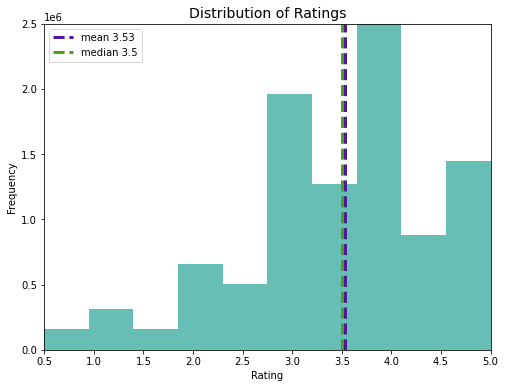

In [18]:
plt.figure(figsize=(8,6))
ax = sns.distplot(train['rating'],bins=10, kde=False, hist_kws=dict(alpha=0.6),color="#009383")
mean = train['rating'].mean()
median = train['rating'].median()
plt.axvline(x=mean, label = f'mean {round(mean,2)}' , color='#4D17A0', lw=3, ls = '--')
plt.axvline(x=median, label = f'median {median}' , color='#4DA017', lw=3, ls = '--')
plt.xlim((0.5,5))
plt.ylim((0,2500000))
plt.title(f'Distribution of Ratings', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Data Preprocessing

## Merging Datasets

In [19]:
# Merging the train and movies data on the movieId column
new_train = train.merge(movies, on='movieId')

In [20]:
new_train.shape

(10000038, 6)

In [21]:
new_train.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [22]:
# Convert timestamp to year column representing the year the rating was made on merged dataframe
new_train['rating_year'] = new_train['timestamp'].apply(lambda timestamp: datetime.fromtimestamp(timestamp).year)
new_train.drop('timestamp', axis=1, inplace=True)

In [24]:
new_train.head()

,userId,movieId,rating,title,genres,rating_year,release_year
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,2018,2008
1,87388,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,2009,2008
2,137050,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,2015,2008
3,120490,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,2014,2008
4,50616,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,2015,2008


In [25]:
# Checking the earliest and most recent ratings years 
new_train['rating_year'].min(), new_train['rating_year'].max()

(1995, 2019)

In [26]:
def get_release_dates(title):
    
    sub = title[-5:-1]
    year = int(sub) if sub.isdigit() else 9999    
    return year

def get_releases_by_year(df, release_years):
    
    mask = df[(df['release_year'] >= release_years[0]) & (df['release_year'] <= release_years[-1])]
    return [mask[mask['release_year'] == year]['movieId'].nunique() for year in release_years]

In [27]:
# Creating the release year by extracting the release year from the movie title
new_train['release_year'] = new_train['title'].apply(get_release_dates)

In [28]:
# Checking number of distinct years for movie releases, including the ealrliest and most recent year
new_train['release_year'].nunique(), new_train['release_year'].min(), new_train['release_year'].max()

(136, 6, 9999)

In [29]:
new_train[new_train['release_year'] != 6]['release_year'].min(), new_train[new_train['release_year'] != 9999]['release_year'].max()

(1874, 2019)

The 9999 is returned by the <a>get_release_dates</a> function, for rows where the movie title does not specify the the release date. The 6 represents instances where the date was in all probability specified incorrectly as 6. The years from 1874 to 2019 represent a 145 year period, while there are 134 distinct years not including 6 and 9999 instances. As such it cannot be concluded that there are 11 years in which no movies were released in this 145 year period, given the above observations.

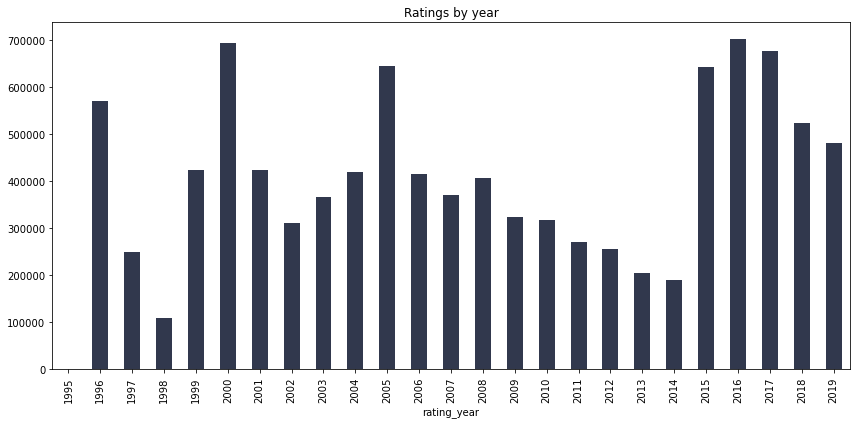

In [30]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
ax1 = new_train.groupby('rating_year')['rating'].count().plot(kind='bar', title='Ratings by year', color='#31384D')
fig.tight_layout()

The ratings for the movies span a period of 25 years, from 1995 all the way to 2019, with the last 5 years accumalatively having had the most ratings in comparison to any othe other 5 year interval. From 2006 to 2014 there is decline in user engagement when it comes to rating movies. Prior to 2006 there are 3 good years with ratings above 500000 ratings for the year, 3 more years at 400000 ratings and 3 below 300000 ratings for the year. it would be of interest to the spending behaviour of users for each of these years, as that would tell the complete story.

In [31]:
# Creating a genre count column, for the number of genres a movie belongs to
new_train['genre_count'] = new_train['genres'].apply(lambda genres: len(genres.split('|')))

In [32]:
# Creating a list of all the genres 
movie_genres = []
new_train['genres'].apply(lambda genres: movie_genres.extend(genres.split('|')))
movie_genres = sorted(set(movie_genres))

In [33]:
new_train['genre_list'] = new_train['genres'].str.split('|')


In [34]:
new_train.drop('genres', axis=1,inplace=True)

In [35]:
combine_movie_rating = new_train.dropna(axis = 0, subset = ['title'])
movie_ratingCount = (combine_movie_rating.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
movie_ratingCount.head()

,title,totalRatingCount
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",1
1,"""Great Performances"" Cats (1998)",67
2,#1 Cheerleader Camp (2010),5
3,#Female Pleasure (2018),1
4,#FollowMe (2019),5


In [36]:
new_train = combine_movie_rating.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
new_train.head()

,userId,movieId,rating,title,rating_year,release_year,genre_count,genre_list,totalRatingCount
0,5163,57669,4.0,In Bruges (2008),2018,2008,4,"[Comedy, Crime, Drama, Thriller]",4253
1,87388,57669,3.5,In Bruges (2008),2009,2008,4,"[Comedy, Crime, Drama, Thriller]",4253
2,137050,57669,4.0,In Bruges (2008),2015,2008,4,"[Comedy, Crime, Drama, Thriller]",4253
3,120490,57669,4.5,In Bruges (2008),2014,2008,4,"[Comedy, Crime, Drama, Thriller]",4253
4,50616,57669,4.5,In Bruges (2008),2015,2008,4,"[Comedy, Crime, Drama, Thriller]",4253


In [44]:
new_train.shape

(7805929, 9)

In [43]:
popularity_threshold = 1000
new_train = new_train.query('totalRatingCount >= @popularity_threshold')
new_train.head()

,userId,movieId,rating,title,rating_year,release_year,genre_count,genre_list,totalRatingCount
0,5163,57669,4.0,In Bruges (2008),2018,2008,4,"[Comedy, Crime, Drama, Thriller]",4253
1,87388,57669,3.5,In Bruges (2008),2009,2008,4,"[Comedy, Crime, Drama, Thriller]",4253
2,137050,57669,4.0,In Bruges (2008),2015,2008,4,"[Comedy, Crime, Drama, Thriller]",4253
3,120490,57669,4.5,In Bruges (2008),2014,2008,4,"[Comedy, Crime, Drama, Thriller]",4253
4,50616,57669,4.5,In Bruges (2008),2015,2008,4,"[Comedy, Crime, Drama, Thriller]",4253


In [45]:
new_train['totalRatingCount'].min(), new_train['totalRatingCount'].max()

(1000, 32831)

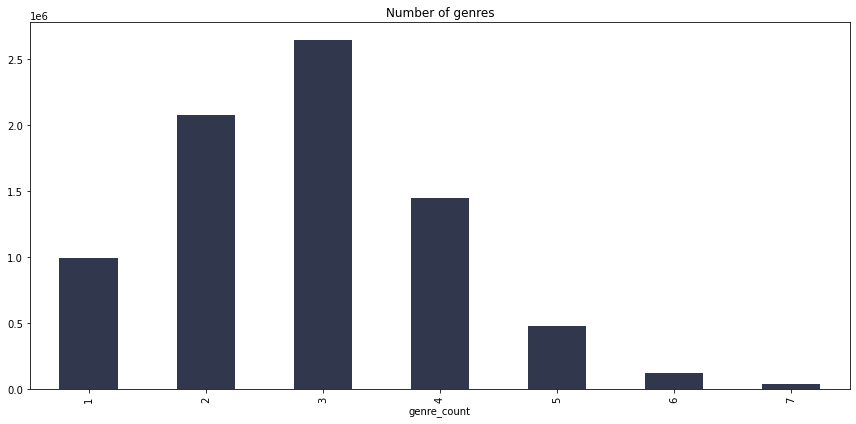

In [46]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax1 = new_train.groupby('genre_count')['rating'].count().plot(kind='bar', title='Number of genres', color = '#31384D')

fig.tight_layout()

In [120]:
# Create a list of only the frequently watched movies
movie_popularity = new_train["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 5000].index

print(popular_movies)

Index(['Shawshank Redemption, The (1994)', 'Forrest Gump (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Jurassic Park (1993)', 'Schindler's List (1993)', 'Braveheart (1995)',
       'Fight Club (1999)',
       ...
       'Star Wars: Episode VII - The Force Awakens (2015)',
       'My Big Fat Greek Wedding (2002)', 'You've Got Mail (1998)',
       'Magnolia (1999)', 'Bridge on the River Kwai, The (1957)',
       'Spaceballs (1987)', 'Ex Machina (2015)', 'Pinocchio (1940)',
       'Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The (2005)',
       'Chocolat (2000)'],
      dtype='object', length=424)


In [121]:
new_train = new_train[new_train['title'].isin(popular_movies)]

In [47]:
new_train.shape

(7805929, 9)

In [48]:
import os
movie_features_df= new_train.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()


userId,1,2,3,4,5,6,7,8,9,10,...,162532,162533,162534,162535,162536,162537,162538,162539,162540,162541
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0
10 Cloverfield Lane (2016),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.5,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0
101 Dalmatians (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [13]:
# # Load the 100k dataset
# train_subset = train[:100000]
# reader = Reader(rating_scale=(train_subset['rating'].min(), train_subset['rating'].max()))
# data = Dataset.load_from_df(train_subset[['userId', 'movieId', 'rating']], reader)
# trainset, testset = train_test_split(data, test_size=.25, random_state=42)

# Modelling

Content Based

In [49]:
from scipy.sparse import csr_matrix
movie_features_df_matrix = csr_matrix(movie_features_df.values)

In [50]:
from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [51]:
movie_features_df.shape

(2118, 162516)

In [57]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
# query_index =5

1746


In [59]:
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 8)

In [60]:
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,162532,162533,162534,162535,162536,162537,162538,162539,162540,162541
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0
10 Cloverfield Lane (2016),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.5,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0
101 Dalmatians (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [61]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Spanish Prisoner, The (1997):

1: Simple Plan, A (1998), with distance of 0.8581426687665761:
2: Player, The (1992), with distance of 0.8609448678077176:
3: Sweet Hereafter, The (1997), with distance of 0.8618938349419247:
4: Big Night (1996), with distance of 0.8726348589345555:
5: Ice Storm, The (1997), with distance of 0.875694565938467:
6: Grifters, The (1990), with distance of 0.8762566425107067:
7: L.A. Confidential (1997), with distance of 0.87756582446565:


### Collaborative Filtering

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user [[5]](#ref5).

#### SVD

The Singular Value Decomposition algorithm is a matrix factorization technique which reduces the number of features of a dataset and was popularized by Simon Funk during the [Neflix Prize](https://en.wikipedia.org/wiki/Netflix_Prize) contest [[6]](#ref6). In the matrix structure, each row represents a user and each column represents a movie. The matrix elements are ratings that are given to movies by users.

In [62]:
reader = Reader(rating_scale=(new_train['rating'].min(), new_train['rating'].max()))

In [63]:
data = Dataset.load_from_df(new_train[['userId', 'movieId', 'rating']].head(2000000), reader)

In [64]:
trainset, testset = train_test_split(data, test_size=.25, random_state=42)

In [149]:
# #Implement an algorithm
# algo = [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), 
#                   KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]

# #Read 10000 dataset
# # data2 = Dataset.load_from_df(train[['userId', 'movieId', 'rating']].head(10000), Reader())

# #Implementing algorithm for RMSE
# algo_rmse=[]
# for a in algo:
    
#     cross_valid=cross_validate(a, data, measures=['RMSE'], cv = 3)
#     output=pd.DataFrame.from_dict(cross_valid).mean(axis=0)
#     output=output.append(pd.Series([str(a).split(' ')[0].split('.')[-1]], index=['Algorithm']))
#     algo_rmse.append(output)

# algo_rmse
# surprise_results = pd.DataFrame(algo_rmse).set_index('Algorithm').sort_values('test_rmse')
# surprise_results

In [65]:
svd_test = SVD(n_epochs = 30, n_factors = 2000, init_std_dev = 0.05, random_state=42, verbose=True)
svd_test.fit(trainset)
predictions = svd_test.test(testset)
# Calculate RMSE
svd_rmse = accuracy.rmse(predictions)

RMSE: 0.8640


#### NormalPredictor  
The Normal Predictor algorithm predicts a random rating for each movie based on the distribution of the training set, which is assumed to be normal.

In [66]:
np_test = NormalPredictor()
np_test.fit(trainset)
predictions = np_test.test(testset)
# Calculate RMSE
np_rmse = accuracy.rmse(predictions)

RMSE: 1.3893


#### BaselineOnly  
The Baseline Only algorithm predicts the baseline estimate for a given user and movie. A baseline is calculated using either Stochastic Gradient Descent (SGD) or Alternating Least Squares (ALS).

In [67]:
bsl_options = {'method': 'sgd','n_epochs': 30}
blo_test = BaselineOnly(bsl_options=bsl_options, verbose=True)
blo_test.fit(trainset)
predictions = blo_test.test(testset)
# Calculate RMSE
blo_rmse = accuracy.rmse(predictions)

Estimating biases using sgd...
RMSE: 0.8791


#### NMF  
NMF is a collaborative filtering algorithm based on Non-negative Matrix Factorization. The optimization procedure is a (regularized) stochastic gradient descent with a specific choice of step size that ensures non-negativity of factors, provided that their initial values are also positive.

In [68]:
nmf_test = NMF(verbose=True)
nmf_test.fit(trainset)
predictions = nmf_test.test(testset)
# Calculate RMSE
nmf_rmse = accuracy.rmse(predictions)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
RMSE: 0.94

In [69]:
knn_basic = KNNBasic(verbose=True)
knn_basic.fit(trainset)
predictions = nmf_test.test(testset)
# Calculate RMSE
knn_b_rmse = accuracy.rmse(predictions)

Computing the msd similarity matrix...


MemoryError: Unable to allocate 180. GiB for an array with shape (155555, 155555) and data type float64

#### SlopeOne  
The SlopeOne algorithm is a simple yet accurate collaborative filtering algorithm that uses a simple linear regression model to solve the data sparisity problem. 

In [70]:
slo_test = SlopeOne()
slo_test.fit(trainset)
predictions = slo_test.test(testset)
# Calculate RMSE
slo_rmse = accuracy.rmse(predictions)

RMSE: 0.8938


#### CoClustering  
The Co-clustering algorithm assigns clusters using a straightforward optimization method, much like k-means.

In [71]:
cc_test = CoClustering(random_state=42)
cc_test.fit(trainset)
predictions = cc_test.test(testset)
# Calculate RMSE
cc_rmse = accuracy.rmse(predictions)

RMSE: 0.9515


# Conclusion 

KAGGLE SUBMISSION FILE

In [73]:
# Train model on whole dataset
reader = Reader(rating_scale=(train['rating'].min(), train['rating'].max()))
data = Dataset.load_from_df(new_train[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
svd = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42, verbose=True)
svd.fit(trainset)

# Create Kaggle submission file
predictions = []
for i, row in test.iterrows():
    x = (svd.predict(row.userId, row.movieId))
    pred = x[3]
    predictions.append(pred)
test['Id'] = test['userId'].map(str) +'_'+ test['movieId'].map(str)
results = pd.DataFrame({"Id":test['Id'],"rating": predictions})
results.to_csv("Team_5_svd.csv", index=False)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39


In [74]:
knn1 = KNNBaseline(k=3)
knn1.fit(trainset)

# Create Kaggle submission file
predictions = []
for i, row in test.iterrows():
    x = (knn1.predict(row.userId, row.movieId))
    pred = x[3]
    predictions.append(pred)
test['Id'] = test['userId'].map(str) +'_'+ test['movieId'].map(str)
results = pd.DataFrame({"Id":test['Id'],"rating": predictions})
results.to_csv("Team_5_knn1.csv", index=False)

Estimating biases using als...
Computing the msd similarity matrix...


MemoryError: Unable to allocate 197. GiB for an array with shape (162516, 162516) and data type float64

In [75]:
bsl_options = {'method': 'sgd','n_epochs': 30}
blo_1 = BaselineOnly(bsl_options=bsl_options, verbose=True)
blo_1.fit(trainset)
# Create Kaggle submission file
predictions = []
for i, row in test.iterrows():
    x = (blo_1.predict(row.userId, row.movieId))
    pred = x[3]
    predictions.append(pred)
test['Id'] = test['userId'].map(str) +'_'+ test['movieId'].map(str)
results = pd.DataFrame({"Id":test['Id'],"rating": predictions})
results.to_csv("Team_5_bsl1.csv", index=False)

Estimating biases using sgd...


In [ ]:

experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/tsikaapp/team-5-unsupervised-ml/65cbfda20cc149f280b941997b726a17
COMET INFO:   Parameters:
COMET INFO:     algorithm     : brute
COMET INFO:     leaf_size     : 30
COMET INFO:     metric        : cosine
COMET INFO:     metric_params : 1
COMET INFO:     n_jobs        : 1
COMET INFO:     n_neighbors   : 5
COMET INFO:     p             : 2
COMET INFO:     radius        : 1.0
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     

COMET INFO: Uploading 3536 metrics, params and output messages
COMET INFO: Uploading 3536 metrics, params and output messages
COMET INFO: Uploading 3536 metrics, params and output messages
COMET INFO: Uploading 3536 metrics, params and output messages
COMET INFO: Uploading 3536 metrics, params and output messages


# References